# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
data.shape

(5391, 6)

In [5]:
data.isna().values.any()

False

In [6]:
data[data.duplicated(['Movie_Title', 'Release_Date']) == True]  # check if there are duplicate rows and find them

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3055,5290,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0


In [7]:
data.drop_duplicates(['Movie_Title', 'Release_Date'], inplace = True)
data.duplicated(['Movie_Title', 'Release_Date']).any()  # check if they're removed

False

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5390 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5390 non-null   int64 
 1   Release_Date           5390 non-null   object
 2   Movie_Title            5390 non-null   object
 3   USD_Production_Budget  5390 non-null   object
 4   USD_Worldwide_Gross    5390 non-null   object
 5   USD_Domestic_Gross     5390 non-null   object
dtypes: int64(1), object(5)
memory usage: 294.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [9]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']
 
for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        data[col] = data[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    data[col] = pd.to_numeric(data[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [10]:
data.Release_Date = pd.to_datetime(data.Release_Date)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5390 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5390 non-null   int64         
 1   Release_Date           5390 non-null   datetime64[ns]
 2   Movie_Title            5390 non-null   object        
 3   USD_Production_Budget  5390 non-null   int64         
 4   USD_Worldwide_Gross    5390 non-null   int64         
 5   USD_Domestic_Gross     5390 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 294.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [12]:
data.describe()  # this answers all the above questions

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,390.00","5,390.00","5,390.00","5,390.00"
mean,"2,695.52","31,119,487.81","88,871,907.20","41,243,169.82"
std,"1,556.14","40,525,356.93","168,469,037.10","66,033,082.74"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.25","5,000,000.00","3,877,146.00","1,335,065.75"
50%,"2,695.50","17,000,000.00","27,460,037.00","17,196,565.00"
75%,"4,042.75","40,000,000.00","96,461,821.00","52,348,661.50"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [13]:
print(f"{len(data[data.USD_Domestic_Gross == 0].values)} films grossed 0$ domestically.")

511 films grossed 0$ domestically.


In [14]:
data[data.USD_Domestic_Gross == 0].sort_values('USD_Production_Budget', ascending=False).head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
4295,1230,2012-12-31,Foodfight!,45000000,73706,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [15]:
print(f"{len(data[data.USD_Worldwide_Gross == 0].values)} films grossed 0$ worldwide.")

356 films grossed 0$ worldwide.


In [16]:
data[data.USD_Worldwide_Gross == 0].sort_values('USD_Production_Budget', ascending=False).head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5092,1435,2015-12-31,The Crow,40000000,0,0
3300,1631,2008-12-31,Black Water Transit,35000000,0,0
5045,1656,2015-10-30,Freaks of Nature,33000000,0,0


### Filtering on Multiple Conditions

In [17]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) * (data.USD_Worldwide_Gross != 0)]  # movies that made no money in the US but made money worldwide, means they released outside the US
international_releases.shape[0]  # number of entries

155

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [18]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
international_releases.shape[0]

155

### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [19]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [20]:
future_releases = data[data.Release_Date > scrape_date]  # movies that are not yet released

print(f"Number of unreleased movies: {len(future_releases)}")
future_releases

Number of unreleased movies: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [21]:
data_clean = data[data.Release_Date <= scrape_date]  # only keep movies released before or on the scrape date
data_clean.sort_values('Release_Date', ascending=False).head()  # check release dates of newest released movies

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5383,2521,2017-12-31,The Thousand Miles,20000000,0,0
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184


In [22]:
data_clean.shape[0]  # number of movies released before or on the scrape date

5383

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [23]:
movies_that_lost_money = data_clean[data_clean.USD_Worldwide_Gross < data_clean.USD_Production_Budget]  # movies that cost more to make than they earned

print(f"{round(len(movies_that_lost_money)/len(data_clean) * 100, 2)}% of movies lost money.")

37.27% of movies lost money.



# Seaborn for Data Viz: Bubble Charts

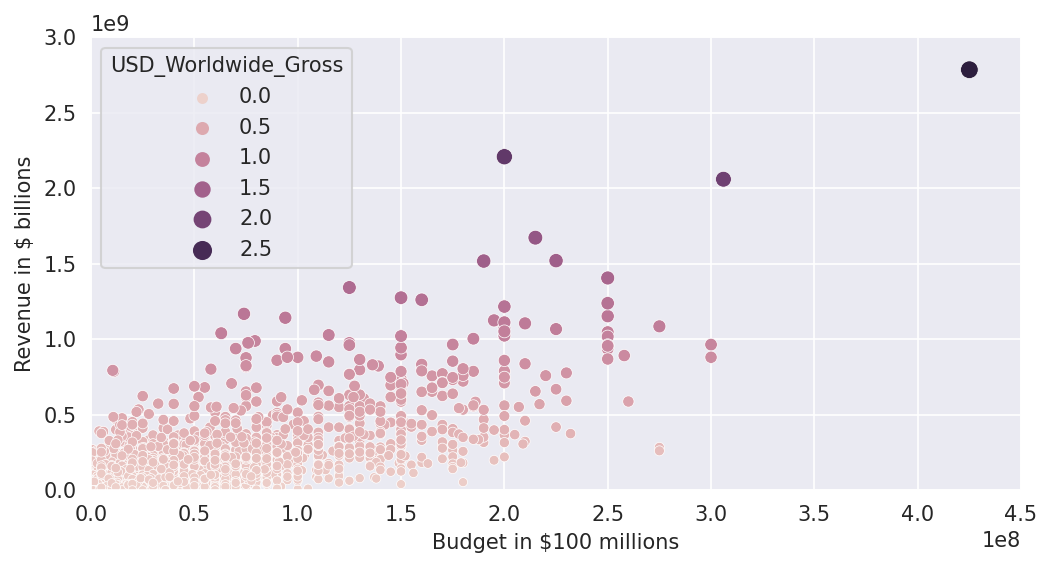

In [24]:
plt.figure(figsize=(8,4), dpi=150)

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                      x='USD_Production_Budget', 
                      y='USD_Worldwide_Gross',
                      hue='USD_Worldwide_Gross', # colour
                      size='USD_Worldwide_Gross',) # dot size
  
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions',)
 
plt.show()


### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



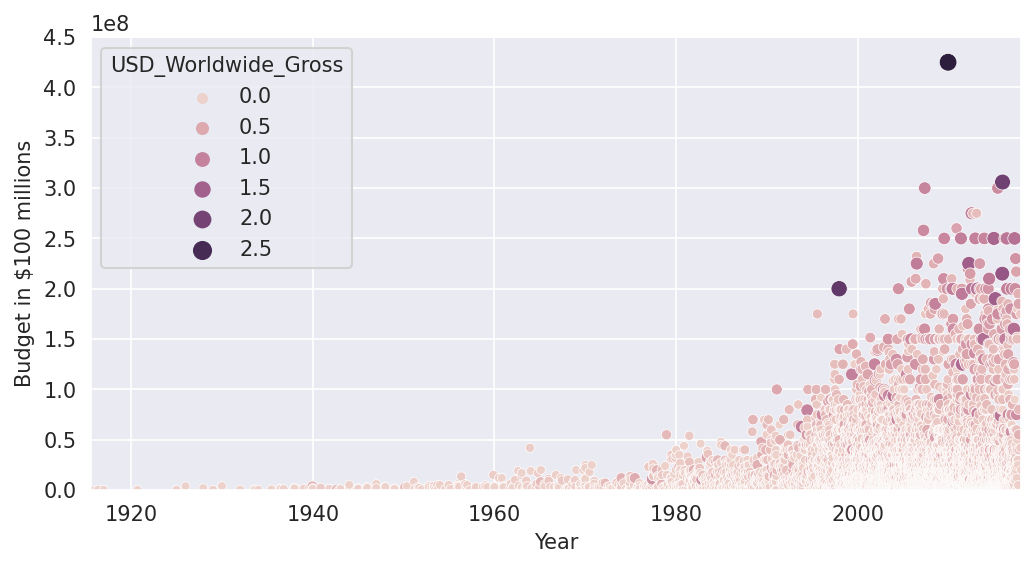

In [25]:
plt.figure(figsize=(8,4), dpi=150)


with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [26]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year

In [27]:
# use floor division to get the year rounded to the nearest 10

years = years // 10  # get rid of the last digit entirely
years = years * 10  # get the last digit we just removed back as a 0

In [28]:
data_clean['Decade'] = years

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [30]:
old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Decade > 1960]

In [31]:
len(old_films)

153

In [32]:
old_films.sort_values('USD_Production_Budget', ascending=False).head(1)  # most expensive movie released pre 1970

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960


# Seaborn Regression Plots

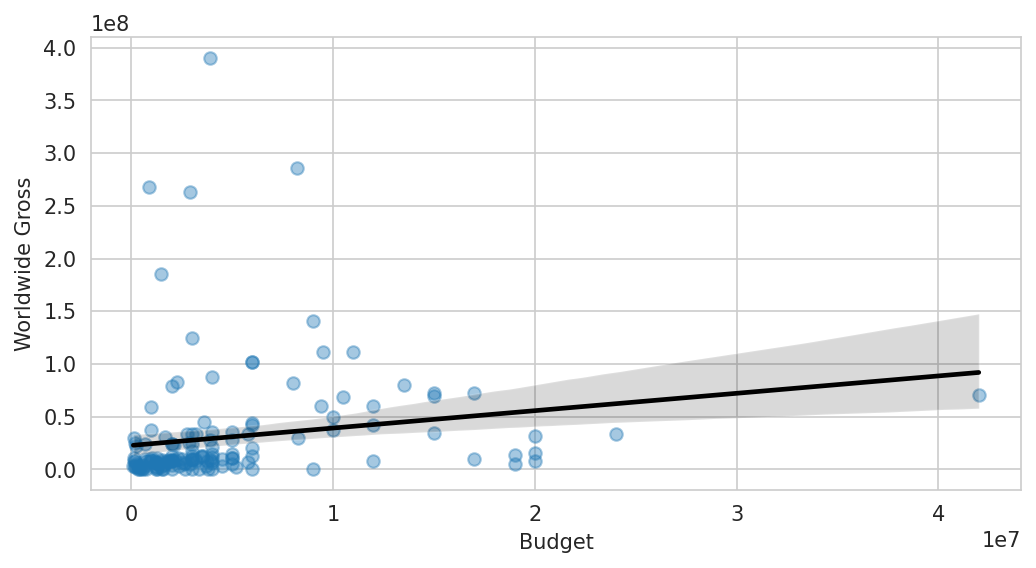

In [33]:
plt.figure(figsize=(8,4), dpi=150)

with sns.axes_style("whitegrid"):
  ax = sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})
  
  ax.set(
      xlabel='Budget',
      ylabel='Worldwide Gross'
  )

plt.show()

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

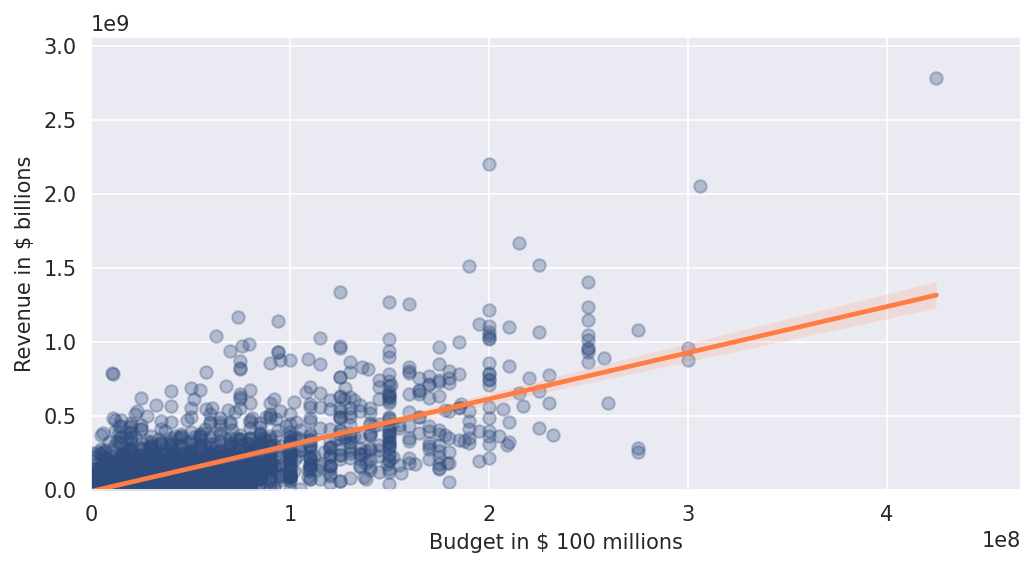

In [34]:
plt.figure(figsize=(8,4), dpi=150)

with sns.axes_style('darkgrid'):
  ax = sns.regplot(
      data = new_films,
      x = new_films.USD_Production_Budget,
      y = new_films.USD_Worldwide_Gross,
      color='#2f4b7c',
      scatter_kws = {'alpha': 0.3},
      line_kws = {'color': '#ff7c43'}
  )

  ax.set(
      xlabel='Budget in $ 100 millions',
      ylabel='Revenue in $ billions',
      xlim = (0, new_films.USD_Production_Budget.max()*1.1),
      ylim = (0, new_films.USD_Worldwide_Gross.max()*1.1)
  )

plt.show()

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [65]:
# we used univariate regression above
# this is regression with a single explanatory variable (budget in this case)
# explanatory variables are also called features 
# the y value is known as the response variable or the target
# the slope of the function tells us how much extra revenue we'd get if we increased budget by a certain amount
# the y intercept tells us how much a movie would make with 0 budget


from sklearn.linear_model import LinearRegression

In [75]:
# linear regression object
regression = LinearRegression()

# explanatory variables / features
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# response variable / target
Y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

# we created new dataframes because LinearRegression objects prefer dataframes over pandas.Series objects
# alternatively, we can use this approach

X = new_films[['USD_Production_Budget']] 
Y = new_films[['USD_Worldwide_Gross']]

# this method works because we are changing the shape of the column from (rows,) to (rows, 1), which is adding a column and turning it into a 2D object by adding double square brackets
# this saves us from creating a new dataframe because all sklearn wants is a 2D object with rows and columns
# can also work with multiple exogenous variables, just do new_films[['USD_Production_Budget', 'USD_Worldwide_Budget']] in this case if you needed both in 1 object

In [76]:
regression.fit(X, Y)  # find the best fit line

LinearRegression()

In [77]:
regression.intercept_  # y-intercept, theta 0

array([-8653311.20858923])

In [78]:
regression.coef_  # slope, theta 1

array([[3.12262611]])

In [79]:
regression.score(X,Y)  # R-Squared, this is the percentage of the variance our model can explain, eg: here, we can explain nearly 56% of the variance in the data, that is amazing for a straight line

0.5576797626619335

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [63]:
old_film_regression = LinearRegression()

X = old_films[['USD_Production_Budget']]
Y = old_films[['USD_Worldwide_Gross']]

old_film_regression.fit(X,Y)

LinearRegression()

In [64]:
print(f"Slope: {old_film_regression.intercept_}\nY-intercept: {old_film_regression.coef_}\nR-squared: {old_film_regression.score(X,Y)}")

Slope: [22821538.63508039]
Y-intercept: [[1.64771314]]
R-squared: 0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [102]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + (regression.coef_[0,0]*budget)
revenue_estimate = round(revenue_estimate, -6)

In [105]:
f"A movie with a budget of $350M is predicted to make around ${str(revenue_estimate)[0:4]}M."

'A movie with a budget of $350 million is predicted to make around $1084M.'